# EDA on property data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("datasets/properties.csv")
df

,PropertyID,Location,Size_sqft,SalePrice
0,2001,Suburb,2996,355372
1,2002,Downtown,2887,505830
2,2003,Suburb,957,338789
3,2004,Countryside,1814,419335
4,2005,Suburb,850,357301
...,...,...,...,...
95,2096,Countryside,2005,271942
96,2097,Suburb,2686,551317
97,2098,Countryside,1889,530264
98,2099,Downtown,1453,502089


## 1. Get an overview of the dataset, including the first few rows, data types, and basic statistics.

In [5]:

# Display the first few rows of the dataset
print(df.head())
print('--------------------------------------------------------------------')
# Get information about the dataset
print(df.info())
print('--------------------------------------------------------------------')

# Get basic statistics for numerical columns
print(df.describe())

   PropertyID     Location  Size_sqft  SalePrice
0        2001       Suburb       2996     355372
1        2002     Downtown       2887     505830
2        2003       Suburb        957     338789
3        2004  Countryside       1814     419335
4        2005       Suburb        850     357301
--------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PropertyID  100 non-null    int64 
 1   Location    100 non-null    object
 2   Size_sqft   100 non-null    int64 
 3   SalePrice   100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB
None
--------------------------------------------------------------------
        PropertyID    Size_sqft      SalePrice
count   100.000000   100.000000     100.000000
mean   2050.500000  1832.410000  401866.300000
std      29.011492   695.5359

## 2. handling missing values if there are any

In [6]:

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
# For example, you can drop rows with missing values:
# df.dropna(inplace=True)
# Or fill missing values with mean/median:
# df.fillna(df.mean(), inplace=True)


PropertyID    0
Location      0
Size_sqft     0
SalePrice     0
dtype: int64


## 3. Visualize the Data:

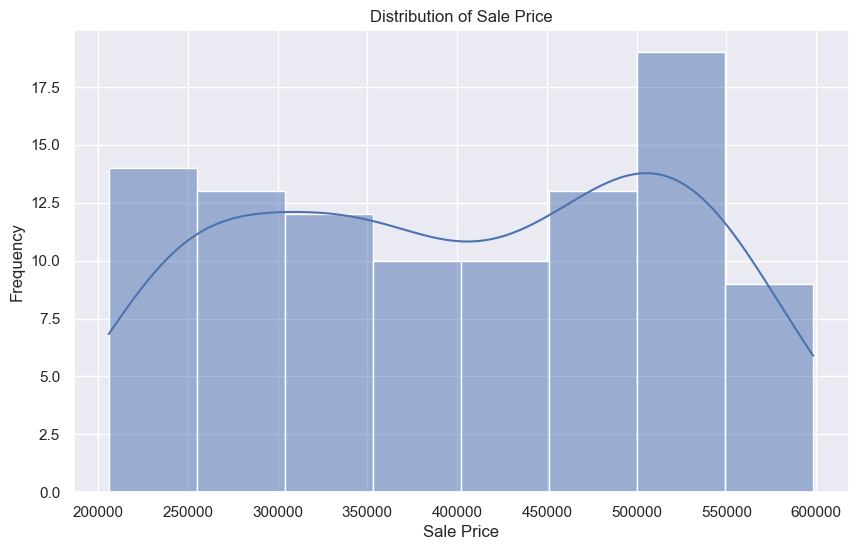

In [8]:
# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()



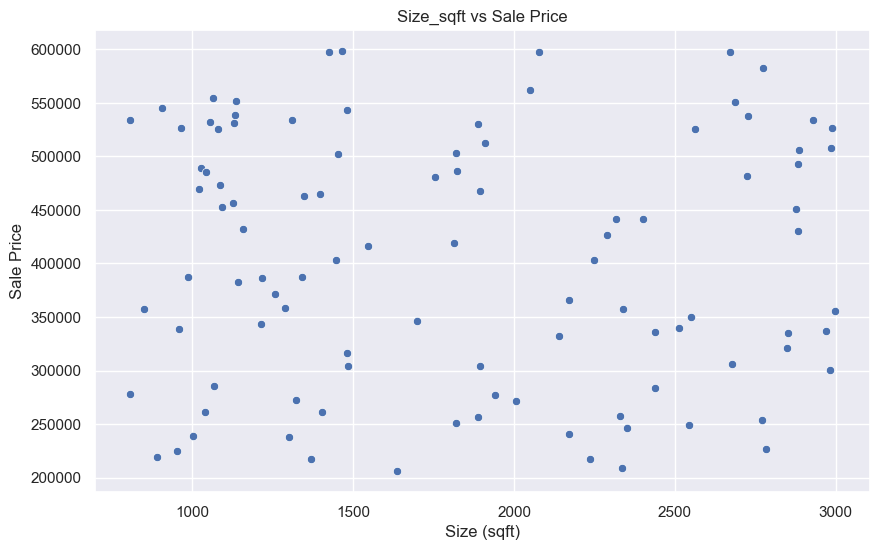

In [9]:
# Relationship between Size_sqft and SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_sqft', y='SalePrice', data=df)
plt.title('Size_sqft vs Sale Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price')
plt.show()

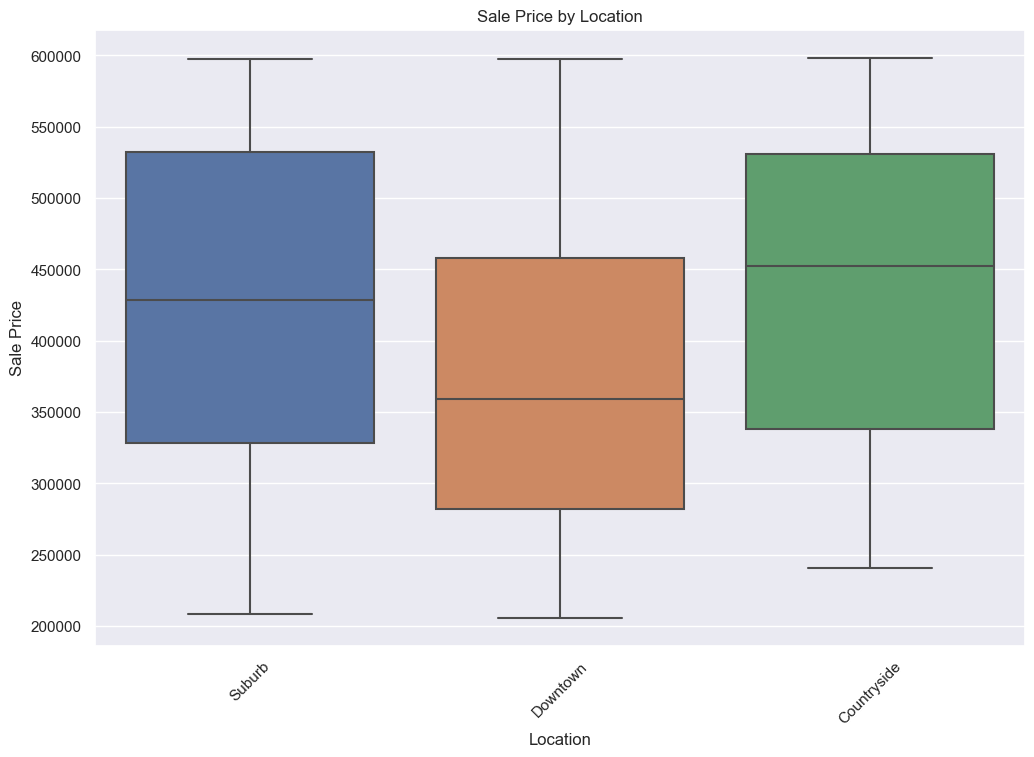

In [10]:
# Relationship between Location and SalePrice
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='SalePrice', data=df)
plt.title('Sale Price by Location')
plt.xlabel('Location')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\tangu\AppData\Local\Temp\ipykernel_22284\2991249742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


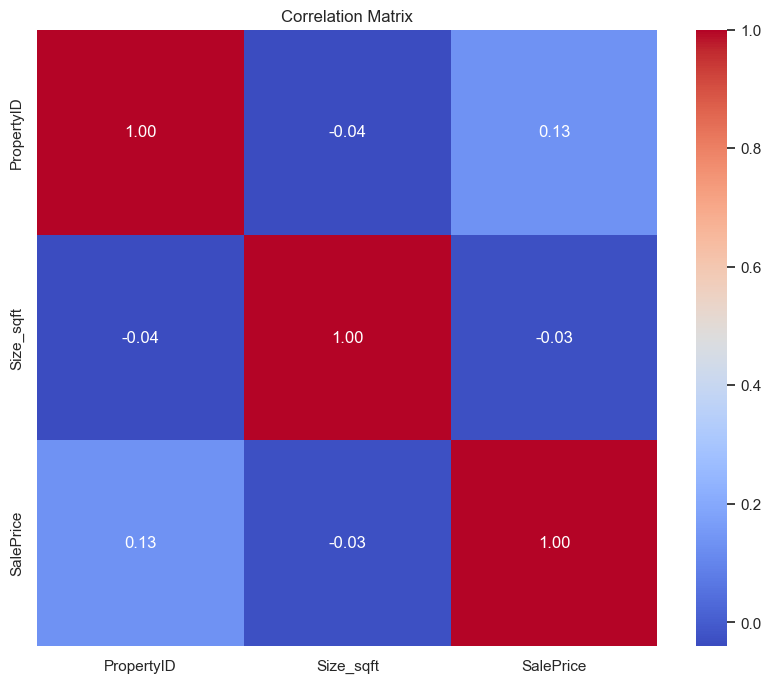

In [11]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## 4. OUtlier detection

### i. Univariate Outlier Detection:

In [13]:
# Z-score method for outlier detection
from scipy import stats

z_scores = stats.zscore(df['SalePrice'])
threshold = 3
outliers = (abs(z_scores) > threshold)
print("Number of outliers:", outliers.sum())

# IQR method for outlier detection
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound))
print("Number of outliers using IQR method:", outliers_iqr.sum())

Number of outliers: 0
Number of outliers using IQR method: 0


### ii. Multivariate Outlier Detection

In [19]:
import numpy as np
from scipy.stats import chi2

def mahalanobis_distance(x, data):
    covariance_matrix = np.cov(data, rowvar=False)
    covariance_matrix_inv = np.linalg.inv(covariance_matrix)
    mean = np.mean(data, axis=0)
    diff = x - mean
    md = np.sqrt(np.dot(np.dot(diff.T, covariance_matrix_inv), diff))
    threshold = chi2.ppf(0.95, df=len(data[0]))  # 95% confidence
    return md, threshold

data = df[['Size_sqft', 'SalePrice']].values
outliers_mahalanobis = []
for index, row in enumerate(data):
    md, threshold = mahalanobis_distance(row, data)
    if md > threshold:
        outliers_mahalanobis.append(index)

print("Number of outliers using Mahalanobis distance:", len(outliers_mahalanobis))


Number of outliers using Mahalanobis distance: 0


### 3. visualise the outliers

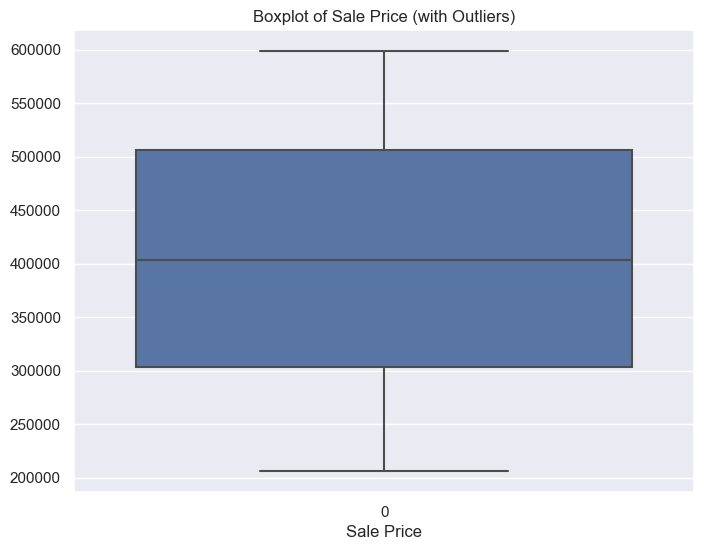

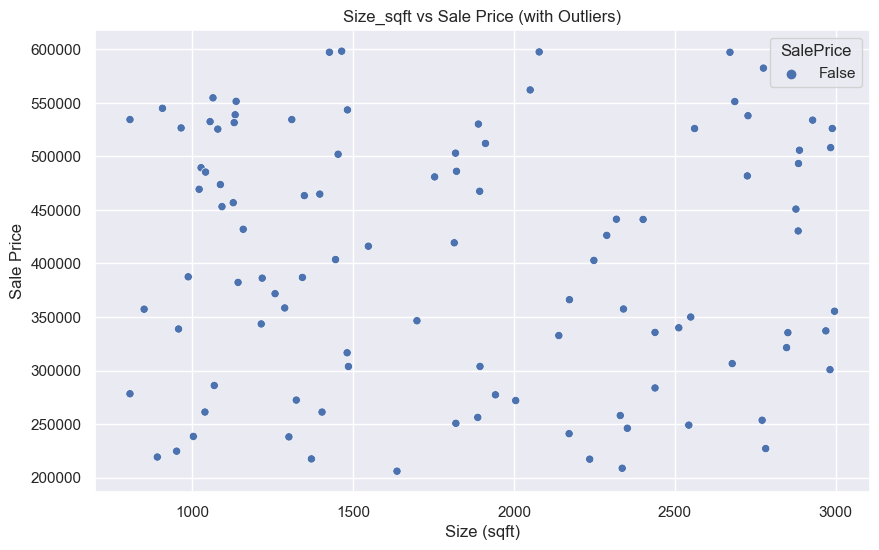

In [17]:
# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['SalePrice'])
plt.title('Boxplot of Sale Price (with Outliers)')
plt.xlabel('Sale Price')
plt.show()

# Scatter plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_sqft', y='SalePrice', data=df, hue=outliers)
plt.title('Size_sqft vs Sale Price (with Outliers)')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price')
plt.show()